# Лабораторная работа №3

В рамках данной лабораторной работы вы проведете разведочный анализ данных.

**Требования:**
* Python >= 3.X
* Библиотеки `pandas`, `matplotlib`.

**Входные данные:**
* Файл sales.csv, в котором содержится информация о видеоиграх и их продажах. Каждая игра описана следующими признаками:
    1. `Rank` - рейтинг игры.    
    2. `Name` - название игры.    
    3. `Platform` - платформа (т.е. PC, PS4, и т.д.).    
    4. `Year` - год выпуска игры.    
    5. `Genre` - жанр игры.    
    6. `Publisher` - Publisher of the game.    
    7. `NA_Sales` - объем продаж в северной Америке (млн).    
    8. `EU_Sales` - объем продаж в Европе (млн).    
    9. `JP_Sales` - объем продаж в Японии (млн).    
    10. `Other_Sales` - объем продаж в остальном мире (млн).    
    11. `Global_Sales` - суммарные продажи в мире (млн).

Лабораторную работу необходимо выполнять в данном шаблоне. Результатом работы будет являться файл (с измененным именем), который необходимо выложить в Moodle.

**Важно!!!** Имя файлу задавайте по следующему шаблону **lab_2.1_Группа_ФамилияИО.ipynb**. Например: если Вас зовут Иванов Иван Иванович, и Вы обучаетесь в группе 6207_010302D, то имя файла будет выглядеть так **lab_2.1_6207_ИвановИИ.ipynb**.

#### Сделайте необходимые импорты:

In [1]:
!pip install matplotlib

import matplotlib.pyplot as plt
import pandas as pd

  Using cached matplotlib-3.5.0-cp39-cp39-win_amd64.whl (7.2 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\bubbl\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\_c_internal_utils.cp39-win_amd64.pyd'
Check the permissions.



ImportError: cannot import name 'animation' from partially initialized module 'matplotlib' (most likely due to a circular import) (C:\Users\bubbl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\__init__.py)

#### Загрузите данные в `pandas.DataFrame` и выведите первые и последние 15 строк.

In [2]:
df = pd.read_csv('sales.csv')
df = pd.DataFrame(df)

print(df.head(15), df.tail(15))

    Rank                         Name Platform    Year         Genre  \
0      1                   Wii Sports      Wii  2006.0        Sports   
1      2            Super Mario Bros.      NES  1985.0      Platform   
2      3               Mario Kart Wii      Wii  2008.0        Racing   
3      4            Wii Sports Resort      Wii  2009.0        Sports   
4      5     Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing   
5      6                       Tetris       GB  1989.0        Puzzle   
6      7        New Super Mario Bros.       DS  2006.0      Platform   
7      8                     Wii Play      Wii  2006.0          Misc   
8      9    New Super Mario Bros. Wii      Wii  2009.0      Platform   
9     10                    Duck Hunt      NES  1984.0       Shooter   
10    11                   Nintendogs       DS  2005.0    Simulation   
11    12                Mario Kart DS       DS  2005.0        Racing   
12    13  Pokemon Gold/Pokemon Silver       GB  1999.0  Role-Pla

#### Проверьте форму (`shape`) данных. Сколько всего объектов в датасете?

In [3]:
print(df.shape)

(16598, 11)


Ответ: 16597

#### Каковы максимальный и средний объем продаж во всем мире (см. `pandas.DataFrame.describe`)?

In [4]:
# print(df.describe())
print(df['Global_Sales'].max())
print(df['Global_Sales'].mean())

82.74
0.5374406555006628


Ответ: max = 82.74; mean = 0.537441

#### Какие типы имеют каждый из признаков (см. `pandas.DataFrame.info`)?

In [5]:
for column_name in df.columns.tolist():
#     print(df.info())
    print(df[column_name].dtype)

int64
object
object
float64
object
object
float64
float64
float64
float64
float64


Ответ: int64, object, object, float64, object, object, float64, float64, float64, float64, float64

#### Оцените количество пропусков по каждому из признаков. Для числовых признаков заполните пропуски медианным значением, для прочих признаков удаляйте строки.

In [6]:
mean_values = {}
for column_name in df.columns.tolist():
    if df[column_name].dtype == df['Year'].dtype:
        mean_values[column_name] = df[column_name].mean()

# mean_values['Year'] = int(mean_values['Year'])

for index, row in df.iterrows():
    for column_name in df.columns.tolist():
        if row[column_name]:
            if column_name in mean_values.keys():
                row[column_name] = mean_values[column_name]
            elif df[column_name].dtype == df['Name'].dtype:
                df.drop(index, inplace=True)
                break

#### Постройте круговую диаграмму количества игр в разрезе жанров. Подпишите каждый сектор. Какой жанр самый популярный?

C:\Users\bubbl\AppData\Local\Temp/ipykernel_23148/952612947.py:8: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(genre_popularity.values(), labels=genre_popularity.keys(), autopct='%1.1f%%')


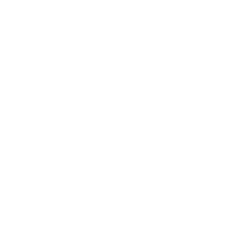

In [7]:
%matplotlib inline

genre_popularity = {}
for index, row in df.iterrows():
    genre_popularity[row['Genre']] = genre_popularity.get(row['Genre'], 0) + 1    

fig, ax = plt.subplots()
ax.pie(genre_popularity.values(), labels=genre_popularity.keys(), autopct='%1.1f%%')

plt.show()

Ответ: <span style="color:red">#впишите сюда</span>

#### Постройте столбчатую диаграмму количества игр в разрезе игровых платформ. Столбцы должны идти в порядке убывания количества игр. Под какую платформу выпустили больше всего игр?

{}


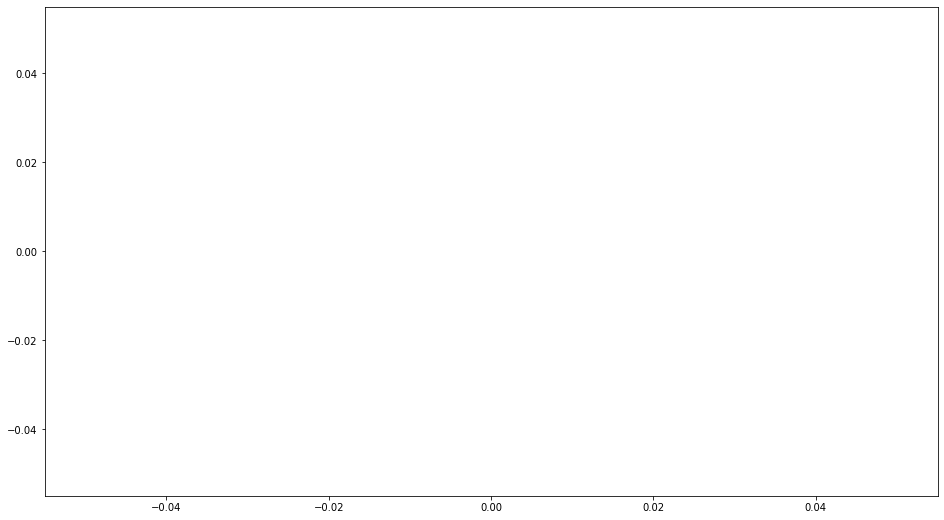

In [11]:
platform_popularity = {}
for index, row in df.iterrows():
    platform_popularity[row['Platform']] = platform_popularity.get(row['Platform'], 0) + 1  
    
print(platform_popularity)

platform_popularity = dict(sorted(platform_popularity.items(), key = lambda x: x[1], reverse = True))
    
fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(platform_popularity.keys(), platform_popularity.values())

plt.show()

Ответ: <span style="color:red">#впишите сюда</span>

#### Постройте столбчатую диаграмму количества игр по годам. Столбцы должны идти в хронологическом порядке. Какая пятилетка была самой удачной для игростроя?

{nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 2020.0: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan:

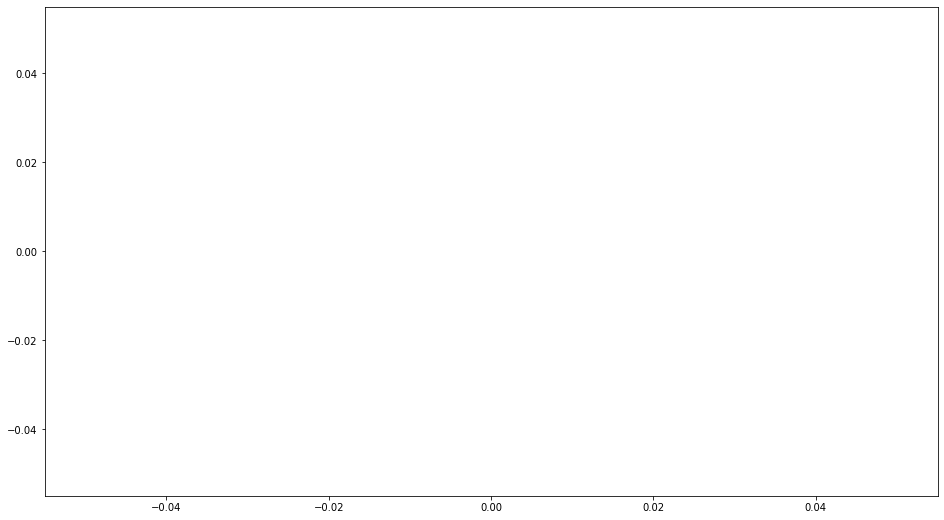

In [66]:
sales_per_year = {}
for index, row in df.iterrows():
    sales_per_year[row['Year']] = sales_per_year.get(row['Year'], 0) + 1  
    
sales_per_year =  dict(sorted(sales_per_year.items(), key = lambda x: x[1]))
print(sales_per_year)

fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(sales_per_year.keys(), sales_per_year.values())

plt.show()

Ответ: <span style="color:red">#впишите сюда</span>

#### Постройте столбчатую диаграмму общих доходов игровой индустрии по годам. Столбцы должны идти в хронологическом порядке. Какой год был самым прибыльным?

In [ ]:
# вставить код сюда

Ответ: <span style="color:red">#впишите сюда</span>

#### Постройте диаграмму рассеивания между платформами и жанрами. Размер точки соответствует объему продаж. 

Пример:
![gr](gr.png)

In [ ]:
# вставить код сюда

#### Постройте линейный график объемов продаж шутеров в Японии по годам. Какой год был самым прибыльным?

In [ ]:
# вставить код сюда

Ответ: <span style="color:red">#впишите сюда</span>

### Дополнительные вопросы

#### Какие игры являются самыми старыми?

In [ ]:
# вставить код сюда

Ответ: <span style="color:red">#впишите сюда</span>

#### Сколько шутеров было выпущено в 2003 году?

In [ ]:
# вставить код сюда

Ответ: <span style="color:red">#впишите сюда</span>